<a href="https://colab.research.google.com/github/PhantomReaPeR/ML_Project/blob/main/heart_disease_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HEART DISEASE PREDICTION ML PROJECT**
In this ML Project I used 3 Different Types of ML model -
1.  K-Nearest Neighbors Algorithm
2.  Decision Tress Classifier
3.  Naive Bayes.


## INDEX

## 1. Data Preprocessing
## 2. Exploratory Data Analysis (EDA)
## 3. Model Implementation
## 4. Model Evaluation
## 5. Cross Validation

## **1. Data Processsing**

* Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

* Loading Data Set

In [3]:
heart = pd.read_csv("https://raw.githubusercontent.com/PhantomReaPeR/ML_Project/main/Data_of_ML/heart.csv")

In [4]:
heart.shape

(1025, 14)

In [5]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


* Checking for missing and null values

In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


* Train Test Split Data

In [7]:
x=heart.iloc[:,:-1]
y=heart.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

* Standardizing

In [9]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [10]:
x_train_new=ss.fit_transform(x_train)
x_test_new=ss.transform(x_test)

## 2. Exploratory Data Analysis (EDA)

In [11]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

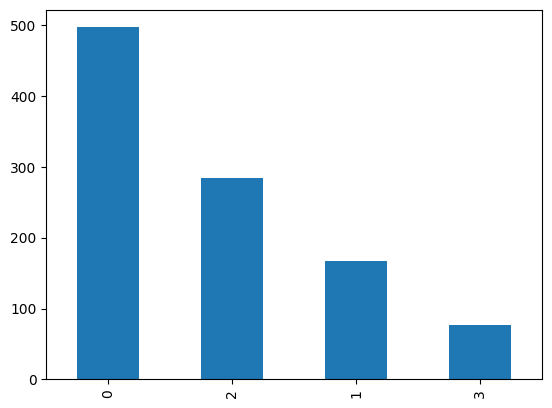

In [12]:
import seaborn as sns
heart['cp'].value_counts().plot.bar()

<Axes: xlabel='cp', ylabel='count'>

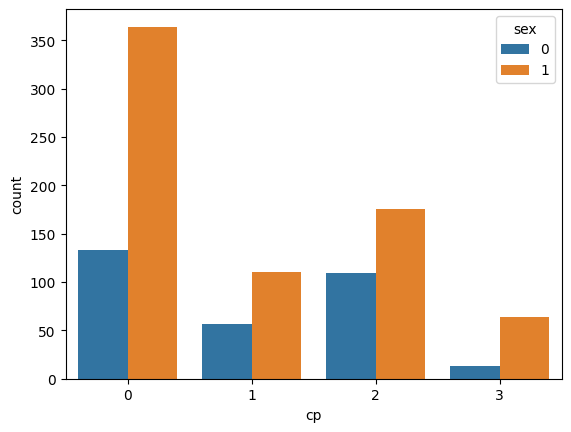

In [13]:
sns.countplot(x=heart['cp'],hue=heart['sex'])

<Axes: ylabel='Frequency'>

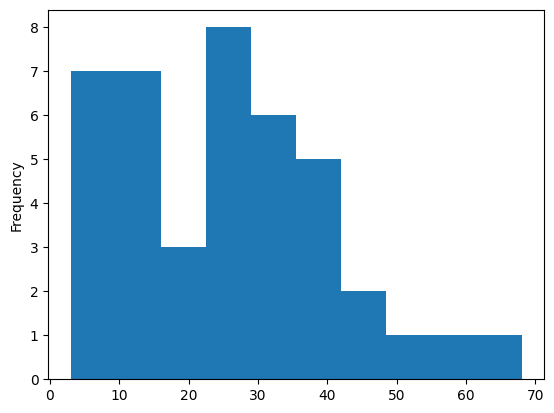

In [14]:
heart['age'].value_counts().plot.hist()

<Axes: xlabel='age', ylabel='Count'>

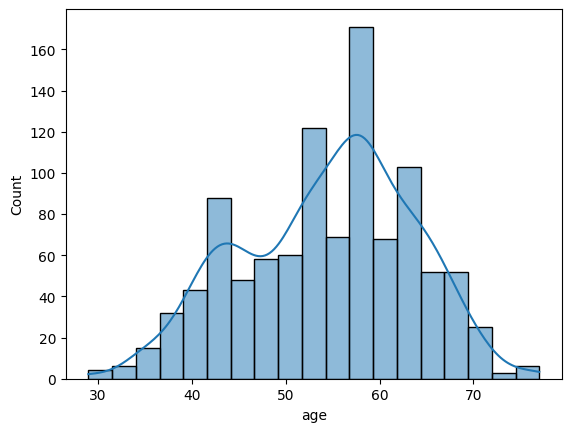

In [15]:
sns.histplot(heart['age'],kde='true')

<Axes: xlabel='sex', ylabel='Density'>

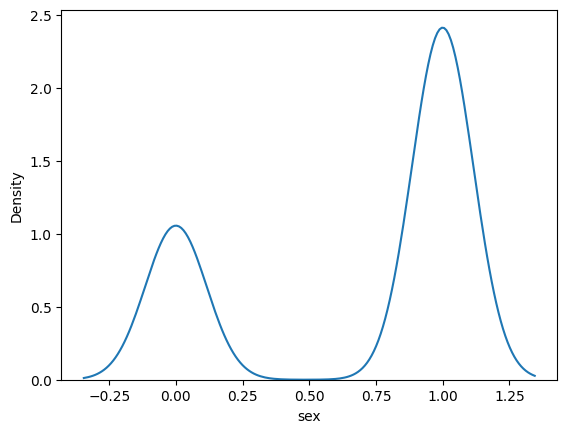

In [16]:
sns.kdeplot(heart['sex'])

<Axes: >

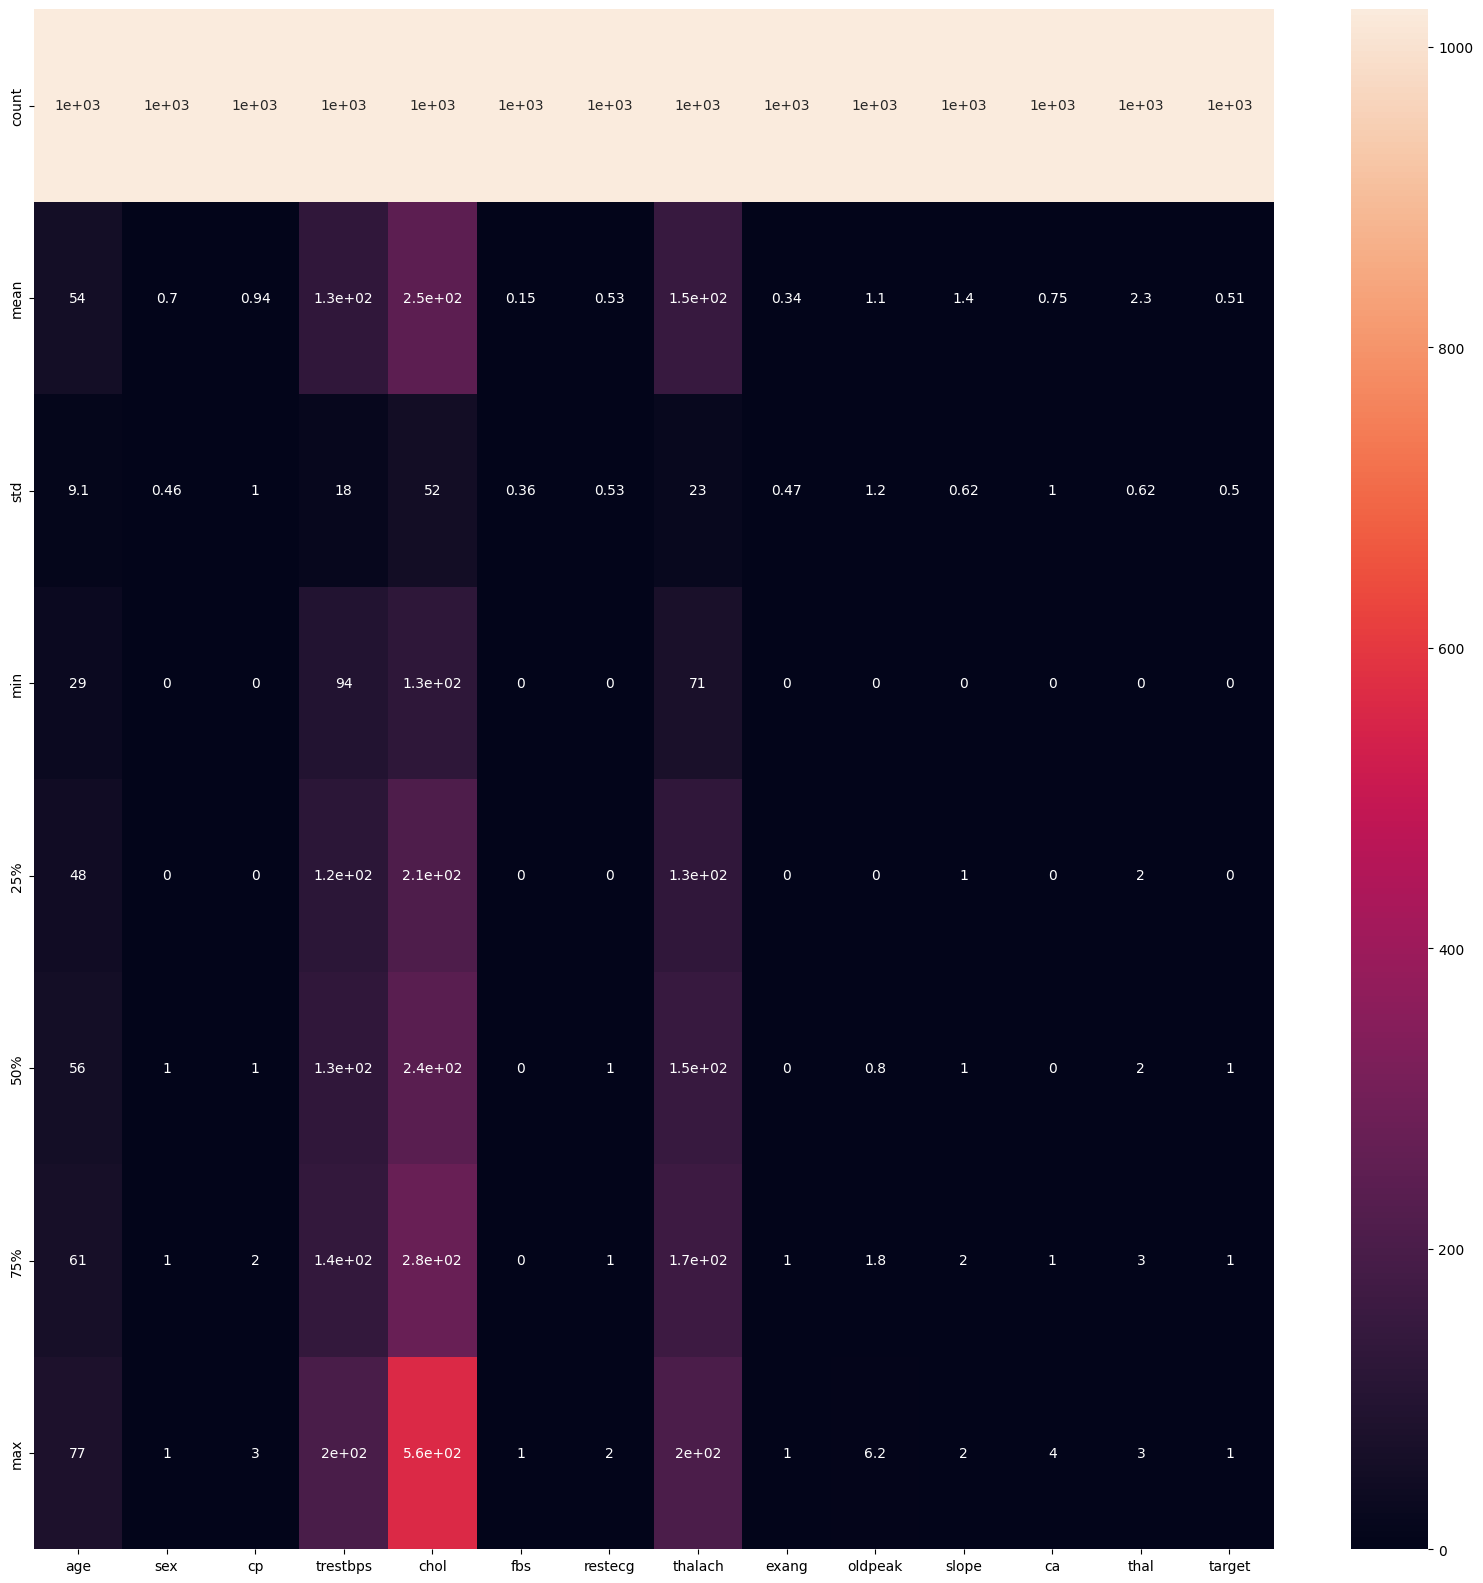

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(heart.describe(),annot=True)

##  **3. Model Implimentation**

* **KNN ( K-Nearest Neighbors )**

In [18]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_new,y_train)
y_pred1 = knn.predict(x_test_new)

* **Decision Tree Classifier**

In [19]:
dtree=DecisionTreeClassifier(random_state=42, max_depth=6)
dtree.fit(x_train_new,y_train)
y_pred2=dtree.predict(x_test_new)

* **Naive Bayes**

In [20]:
g=GaussianNB()
g.fit(x_train_new,y_train)
y_pred3 = g.predict(x_test_new)

## 4. **Model Evaluation**

* **Accuracy Details of K-Nearest Neighbors ( KNN )**

In [21]:
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test,y_pred1,average = "weighted")
recall = recall_score(y_test,y_pred1,average = "weighted")
f1 = f1_score(y_test,y_pred1,average = "weighted")
conf_matrix = confusion_matrix(y_test,y_pred1)

print("KNN Accuracy:", int(100*accuracy),"%")
print("KNN Precision:", precision)
print("KNN Recall:", recall)
print("KNN F1 score:", f1)
print("Confusion Matrix")
print(conf_matrix)

KNN Accuracy: 83 %
KNN Precision: 0.83869918699187
KNN Recall: 0.8341463414634146
KNN F1 score: 0.8335281942268965
Confusion Matrix
[[79 23]
 [11 92]]


* **Accuracy Details of Decision Tree Classifier**

In [22]:
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test,y_pred2,average = "weighted")
recall = recall_score(y_test,y_pred2,average = "weighted")
f1 = f1_score(y_test,y_pred2,average = "weighted")
conf_matrix = confusion_matrix(y_test,y_pred2)

print("Decision Tree Classifier Prediction details: \n")
print("Accuracy Score  :",int(100*accuracy),"%")
print("Precision Score :",precision)
print("Recall Score    :",recall)
print("  f1 Score      :",f1)
print("Confusion Matrix:\n",conf_matrix)

Decision Tree Classifier Prediction details: 

Accuracy Score  : 88 %
Precision Score : 0.8901368279417059
Recall Score    : 0.8829268292682927
  f1 Score      : 0.882338662621076
Confusion Matrix:
 [[83 19]
 [ 5 98]]


* **Accuracy Details of Naive Bayes**

In [23]:
accuracy = accuracy_score(y_test, y_pred3)
precision = precision_score(y_test,y_pred3,average = "weighted")
recall = recall_score(y_test,y_pred3,average = "weighted")
f1 = f1_score(y_test,y_pred3,average = "weighted")
conf_matrix = confusion_matrix(y_test,y_pred3)

print("GNB Accuracy:", int(100*accuracy),"%")
print("GNB Precision:", precision)
print("GNB Recall:", recall)
print("GNB F1 score:", f1)
print("Confusion Matrix")
print(conf_matrix)

GNB Accuracy: 80 %
GNB Precision: 0.8105076041872408
GNB Recall: 0.8
GNB F1 score: 0.798174174174174
Confusion Matrix
[[72 30]
 [11 92]]


* **Total Accuracy details**

In [24]:
result=pd.DataFrame({'Model':['K-Nearest Neighbors','Decision Tree Classifier','Naive Bayes'],'Accuracy':[recall_score(y_pred1,y_test)*100,recall_score(y_pred2,y_test)*100,recall_score(y_pred3,y_test)*100]})

In [25]:
result

,Model,Accuracy
0,K-Nearest Neighbors,80.000000
1,Decision Tree Classifier,83.760684
2,Naive Bayes,75.409836


## **5. Cross Validation**

In [26]:
from sklearn.model_selection import cross_val_score

* **Cross Validation of K-Nearest Neighbors ( KNN )**

In [27]:
scores1 = cross_val_score(knn, x_train_new, y_train, cv=10)
scores1

array([0.87804878, 0.8902439 , 0.85365854, 0.82926829, 0.87804878,
       0.86585366, 0.87804878, 0.79268293, 0.80487805, 0.7804878 ])

* **Cross Validation of Decision Tree Classifier**

In [28]:
scores2 = cross_val_score(dtree, x_train_new, y_train, cv=10)
scores2

array([0.92682927, 0.93902439, 0.92682927, 0.8902439 , 0.93902439,
       0.91463415, 0.95121951, 0.97560976, 0.91463415, 0.87804878])

* **Cross Validation of Naive Bayes**

In [29]:
scores3 = cross_val_score(g, x_train_new, y_train, cv=10)
scores3

array([0.84146341, 0.81707317, 0.82926829, 0.79268293, 0.84146341,
       0.82926829, 0.8902439 , 0.85365854, 0.79268293, 0.80487805])